<h1>Taylor Swift Youtube Channel Statistics</h1>

<div>
<img src="ts.jfif" width="650"/>
</div>

<h4>
I'm a big fan of Taylor Swift. I adore her talent of songwriting and we all know that she is one of the most successful music artists of all time, having sold over 50 million albums and 150 million singles worldwide. </h4>

<h4>Taylor Swift uses storytelling in her music videos to illustrate the narratives in her songs visually. She has also directed several of her own music videos!</h4>

<h4>With that being said, I'm so curious about the statistics of her youtube channel. She has more that 50 million subscribers and more that 25 billion views!</h4> 
    
<h4>So let's see what's going on in Taylor's channel!</h4>

<h4>(I created my own dataset using Youtube API v3)</h4>

----------------------------------------------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------------------------------------------

<h1>Data Pre-processing, Cleaning and EDA:</h1>

In [1]:
#importing necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import isodate

In [2]:
#loading the dataset
df = pd.read_csv('youtube_ts.csv')

In [3]:
#getting some information about the dataset
#checking data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 473 entries, 0 to 472
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   video_id        473 non-null    object 
 1   channelTitle    473 non-null    object 
 2   title           473 non-null    object 
 3   description     460 non-null    object 
 4   tags            435 non-null    object 
 5   publishedAt     473 non-null    object 
 6   viewCount       473 non-null    int64  
 7   likeCount       472 non-null    float64
 8   favouriteCount  0 non-null      float64
 9   commentCount    473 non-null    int64  
 10  duration        473 non-null    object 
 11  definition      473 non-null    object 
 12  caption         473 non-null    bool   
dtypes: bool(1), float64(2), int64(2), object(8)
memory usage: 44.9+ KB


In [4]:
#removing unnecessary columns
cols = ['description' , 'favouriteCount' , 'definition' , 'tags', 'caption']
df = df.drop(cols , axis=1)

In [6]:
#checking for null values
df.isnull().any()

video_id        False
channelTitle    False
title           False
publishedAt     False
viewCount       False
likeCount        True
commentCount    False
duration        False
dtype: bool

In [7]:
#taking care of missing data
#likeCount has 472 entries out of 473
df['likeCount'] = df['likeCount'].interpolate()

In [8]:
# convert duration to seconds
df['durationSecs'] = df['duration'].apply(lambda x: isodate.parse_duration(x).total_seconds())
df = df.drop('duration' , axis=1)

In [9]:
#Likes per 1000 view ratio
df['likeRatio'] = df['likeCount']/ df['viewCount'] * 1000

In [10]:
# Convert the "datetime" column to a datetime object
df["publishedAt"] = pd.to_datetime(df["publishedAt"])

# Create new columns "year" and "month" that contain the year and month of the datetime column
df["year"] = df["publishedAt"].dt.year
df["month"] = df["publishedAt"].dt.month

# Drop the original date column
df.drop("publishedAt", axis=1 , inplace=True)

In [11]:
#checking for duplicates
df.duplicated().value_counts()

False    473
Name: count, dtype: int64

In [12]:
df.head(5)

,video_id,channelTitle,title,viewCount,likeCount,commentCount,durationSecs,likeRatio,year,month
0,anqxTwGE_nQ,Taylor Swift,Taylor Swift - Lavender Haze (Acoustic Version),910278,65959.0,3315,180.0,72.460281,2023,3
1,kE31ShDEOwg,Taylor Swift,Taylor Swift - Lavender Haze (Snakehips Remix),458508,14623.0,892,191.0,31.892573,2023,3
2,nfFujEdM0_E,Taylor Swift,Taylor Swift - Lavender Haze (Jungle Remix),198248,13399.0,1029,239.0,67.587063,2023,3
3,ZZtamrXjB_w,Taylor Swift,Taylor Swift - Lavender Haze (Tensnake Remix),184359,13490.0,756,218.0,73.172452,2023,3
4,pCH19_8E4Hw,Taylor Swift,Taylor Swift - Lavender Haze (Behind The Scenes),916936,98380.0,3491,212.0,107.292112,2023,3


<h2>We want to know the top 10 videos that got the most views, the most likes, and the most comments:</h2>

In [13]:
def top_ten(column_of_interest,column_stats):
    
    ddf = df.groupby(column_of_interest)[['viewCount', 'likeCount', 'commentCount']].apply(lambda x: x.astype(int).sum())
    
    return ddf.sort_values(by=column_stats, ascending=False).head(10)


<h2>The most viewed:</h2>
<h3>"Shake it off" is number 1 with more than 3 billion views!!</h3>

In [14]:
top_ten('title','viewCount')

,viewCount,likeCount,commentCount
title,,,
Taylor Swift - Shake It Off,3278581125,12479824,567778
Taylor Swift - Blank Space,3144996554,14358023,629012
Taylor Swift - Bad Blood ft. Kendrick Lamar,1547642113,9590490,463193
Taylor Swift - You Belong With Me,1429787194,9311358,424296
Taylor Swift - Look What You Made Me Do,1396922798,12762572,745965
Taylor Swift - Wildest Dreams,867928578,5248801,230763
Taylor Swift - Style,760149349,3808259,157257
Taylor Swift - We Are Never Ever Getting Back Together,726170761,3996406,221429
"ZAYN, Taylor Swift - I Don’t Wanna Live Forever (Fifty Shades Darker)",700477082,5048251,133417


<h2>The most liked:</h2>
<h3>"Blank Space" is a fan favorite! With more than 14 million likes, it's number 1!</h3>

In [15]:
top_ten('title','likeCount')

,viewCount,likeCount,commentCount
title,,,
Taylor Swift - Blank Space,3144996554,14358023,629012
Taylor Swift - Look What You Made Me Do,1396922798,12762572,745965
Taylor Swift - Shake It Off,3278581125,12479824,567778
Taylor Swift - Bad Blood ft. Kendrick Lamar,1547642113,9590490,463193
Taylor Swift - You Belong With Me,1429787194,9311358,424296
Taylor Swift - ME! (feat. Brendon Urie of Panic! At The Disco) ft. Brendon Urie,403457982,6159095,436870
Taylor Swift - Wildest Dreams,867928578,5248801,230763
"ZAYN, Taylor Swift - I Don’t Wanna Live Forever (Fifty Shades Darker)",700477082,5048251,133417
"🫣 Join my #TSAntiHeroChallenge and share your anti-heroic traits, brought to you by YouTube Shorts.",124434764,4936065,21708


<h2>The most commented:</h2>
<h3>Fans had a lot to say about "Look what you made me do"! It is number 1 with more than half a million comments!</h3>

In [16]:
top_ten('title','commentCount')

,viewCount,likeCount,commentCount
title,,,
Taylor Swift - Look What You Made Me Do,1396922798,12762572,745965
Taylor Swift - Blank Space,3144996554,14358023,629012
Taylor Swift - Shake It Off,3278581125,12479824,567778
Taylor Swift - Bad Blood ft. Kendrick Lamar,1547642113,9590490,463193
Taylor Swift - ME! (feat. Brendon Urie of Panic! At The Disco) ft. Brendon Urie,403457982,6159095,436870
Taylor Swift - You Belong With Me,1429787194,9311358,424296
Taylor Swift - 22,634942000,3214102,277808
Taylor Swift - I Knew You Were Trouble,507655084,3632137,269636
Taylor Swift - You Need To Calm Down,304111912,4520894,245905


<h2>Total views of all videos:</h2>
<h3>More than 25 billion times!</h3>

In [17]:
sum_views = df['viewCount'].sum()
sum_views

25802469490

<h2>Average view count per video:</h2>
<h3>More than 54 million views!</h3>

In [18]:
average_views = df["viewCount"].mean()
average_views

54550675.45454545

<h1>Data Visualization:</h1>

<h2>The view count over time:</h2>
<h3>Based on our previous discovery, we found out that the video with the most views belongs to 'Shake it off'.</h3>

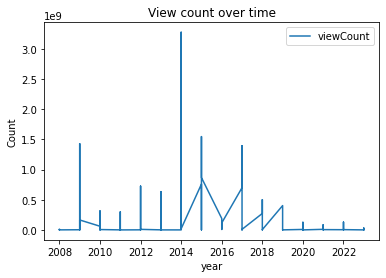

In [19]:
df.plot(x="year", y=["viewCount"], kind="line")
plt.xlabel("year")
plt.ylabel("Count")
plt.title("View count over time")
plt.show()

<h3>The plot above is showing us that the most views belong to 2014.</h3>
<h3>So here I check the info of the 'Shake it off' video, and we can see that it was published in 2014.</h3>

In [20]:
mostview_info = df.loc[(df['title'] == 'Taylor Swift - Shake It Off')]
mostview_info

,video_id,channelTitle,title,viewCount,likeCount,commentCount,durationSecs,likeRatio,year,month
297,nfWlot6h_JM,TaylorSwiftVEVO,Taylor Swift - Shake It Off,3278581125,12479824.0,567778,242.0,3.806471,2014,8


<h2>The like ratio of her videos increases every year! Honestly, I'm not surprised. :))) </h2>

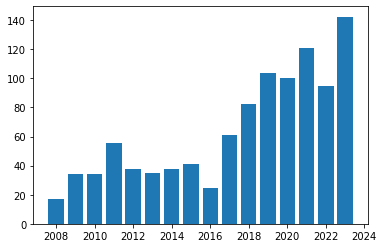

In [21]:
plt.bar(df['year'], df['likeRatio'])
plt.show()

<h2>What kind of videos are the most popular? Short length or long ones?</h2>

<h3>Most videos are between 200 and 300 seconds, which is equal to 3 to 5 minutes.</h3>

<Axes: xlabel='durationSecs', ylabel='Count'>

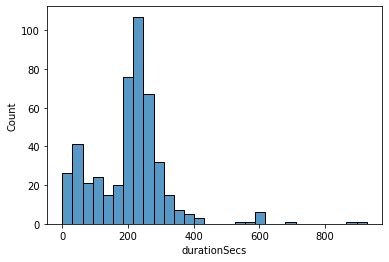

In [22]:
#1200s = 60s * 20m
sns.histplot(data=df[df['durationSecs'] < 1200], x="durationSecs", bins=30)

<h3>Shorter videos get more likes and comments than long videos.</h3>

<Axes: xlabel='durationSecs', ylabel='likeCount'>

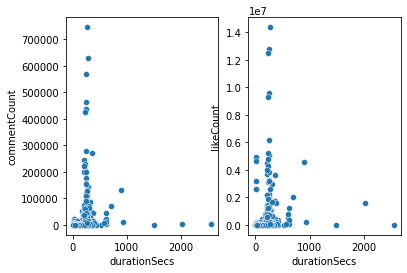

In [23]:
fig, ax =plt.subplots(1, 2)
sns.scatterplot(data = df, x = "durationSecs", y = "commentCount", ax=ax[0])
sns.scatterplot(data = df, x = "durationSecs", y = "likeCount", ax=ax[1])